In [1]:
from kmeans import Kmeans
from utils import load_from_numpy, load_mnist
import matplotlib.pyplot as plt
import numpy as np

In [2]:
X, Y = load_mnist()
K = 14
epochs = 100
model = Kmeans(X, K, epochs)
model.fit()

0 / 100
1 / 100
2 / 100
3 / 100
4 / 100
5 / 100
6 / 100
7 / 100
8 / 100
9 / 100
10 / 100
11 / 100
12 / 100
13 / 100
14 / 100
15 / 100
16 / 100
17 / 100
18 / 100
19 / 100
20 / 100
21 / 100
22 / 100
23 / 100
24 / 100
25 / 100
26 / 100
27 / 100
28 / 100
29 / 100
30 / 100
31 / 100
32 / 100
33 / 100
34 / 100
35 / 100
36 / 100
37 / 100
38 / 100
39 / 100
40 / 100
41 / 100
42 / 100
43 / 100
44 / 100
45 / 100
46 / 100
47 / 100
48 / 100
49 / 100
50 / 100
51 / 100
52 / 100
53 / 100
54 / 100
55 / 100
56 / 100


In [3]:
encoded = model.encode(X[0])
print(encoded)

12


In [4]:
decoded = model.decode(encoded)

<ipython-input-10-7ddf53e174f5>:5: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(len(images) / columns + 1, columns, i + 1)


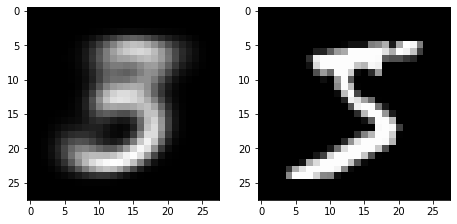

In [10]:
images = [np.reshape(decoded, (28, 28)), np.reshape(X[0], (28, 28))]
plt.figure(figsize=(20,10))
columns = 5
for i, image in enumerate(images):
    plt.subplot(len(images) / columns + 1, columns, i + 1)
    plt.imshow(image, cmap='gray')

In [6]:
encoded_l = []
for x in X:
    encoded_l.append(model.encode(x))

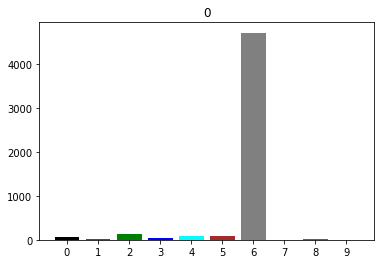

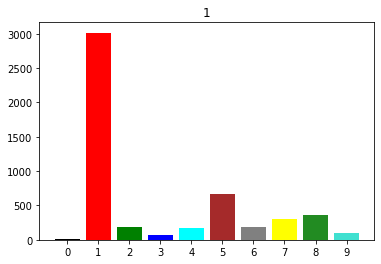

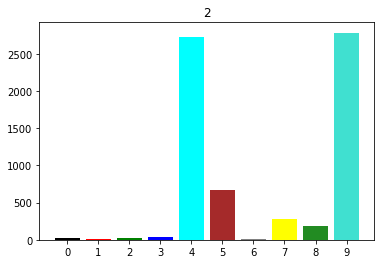

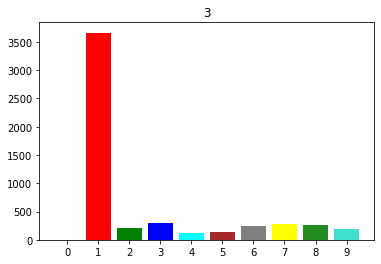

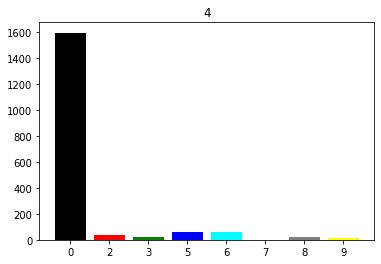

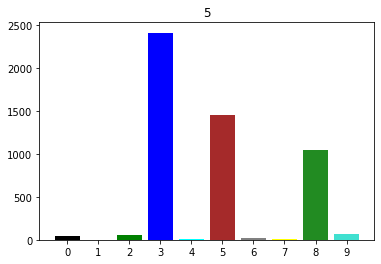

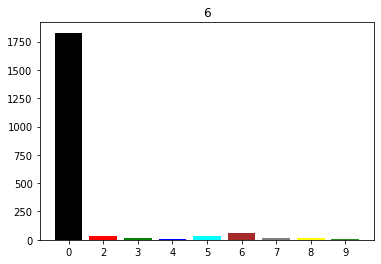

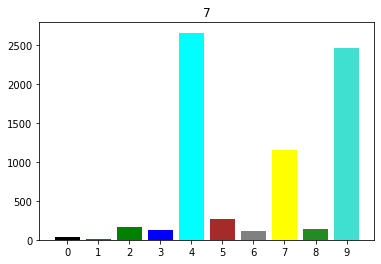

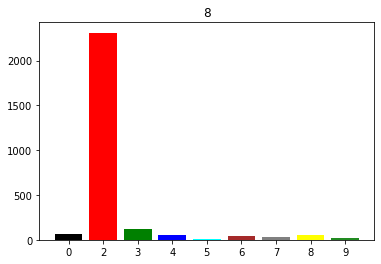

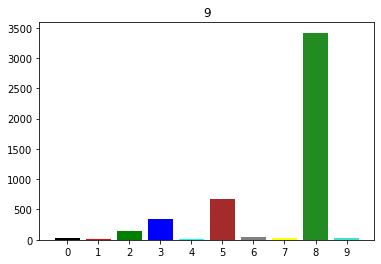

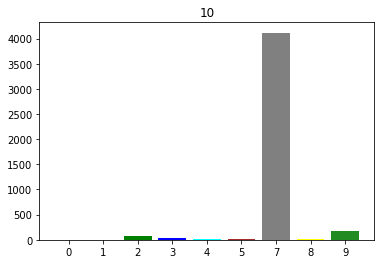

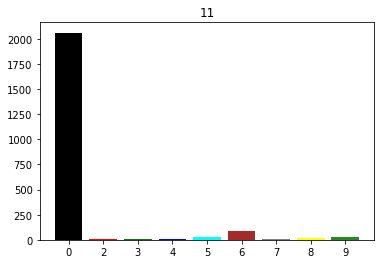

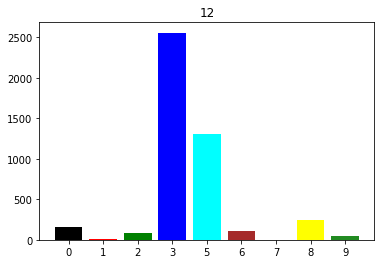

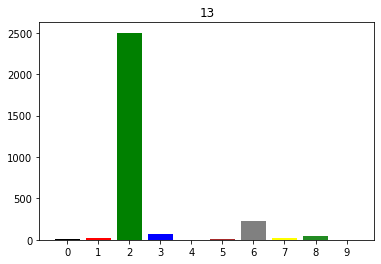

In [7]:
from collections import Counter
import collections
encoded_dic = {}

for i in range(len(Y)):
    if encoded_l[i] not in encoded_dic:
        encoded_dic[encoded_l[i]] = []
    encoded_dic[encoded_l[i]].append(Y[i])
    

l = []
for i in range(K):
    d = dict(Counter(encoded_dic[i]))
    od = collections.OrderedDict(sorted(d.items()))
    l.append(od)

for i, D in enumerate(l):
    plt.title(f"{i}")
    plt.bar(range(len(D)), list(D.values()), align='center', color=['black', 'red', 'green', 'blue', 'cyan', "brown", "gray", "yellow", "forestgreen", "turquoise"])
    plt.xticks(range(len(D)), list(D.keys()))
    plt.show()



<ipython-input-9-eb3900bf3b7e>:9: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(len(images) / columns + 1, columns, i + 1)


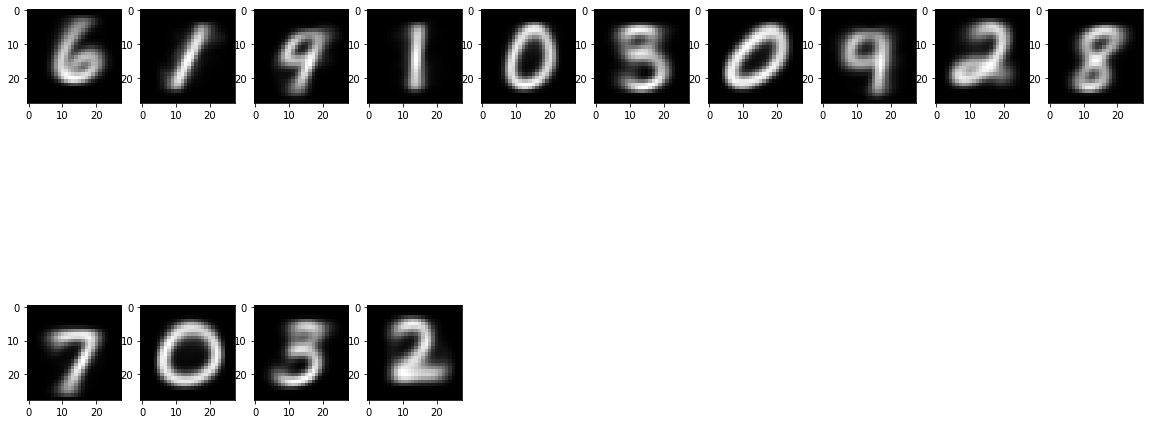

In [9]:
decoded_list = []
for i in range(K):
    decoded_list.append(model.decode(i))
    
images = [np.reshape(decoded, (28, 28)) for decoded in decoded_list] 
plt.figure(figsize=(20,10))
columns = 10
for i, image in enumerate(images):
    plt.subplot(len(images) / columns + 1, columns, i + 1)
    plt.imshow(image, cmap='gray')

Une Bonne valeur pour n'avoir presque aucune perte est K=14. En dessous, il se peut qu'il n'y ait pas tous les labels représenté. Cependant avec K > 10, on a des clusters qui sont proches. Tel que la représentation du 0 et 1, car ils sont proche de 8/9 et 7.